# AdaBoost on English hand written digits with 16 extracted features
The source code is a simple implementation for English hand written digits classification based on 16 extracted features with the python programming language and AdaBoost. 

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour/

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from statistics import mode
sns.set(style = "darkgrid")
plt.rcParams["figure.figsize"] = (10,6)


In [30]:
#loading data
train_data = pd.read_csv("./dataset/data_train.csv",  names=list(range(16))+["class"])
test_data = pd.read_csv("./dataset/data_test.csv",  names=list(range(16))+["class"])

#shuffle data
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [31]:
def CalculateMetricsAndPlot(true_label, predicted_label,color,n):
    #calculate metrics
    CM = confusion_matrix(true_label, predicted_label)
    acc = round(accuracy_score(true_label,predicted_label)*100,2)
    precision = round(precision_score(true_label,predicted_label, average='macro'),2)
    
    #plot confusion matrix with accuracy and precision
    sns.heatmap(CM ,annot=True, cmap=color, fmt='g').set_title("Confusion Matrix for Test Data(Count of Trees:{2}) | Accuracy={0}% | Precision={1}".format(acc,precision,n))
    plt.show()
    
    
def MakeAdaBoost(n=10,color="Blues"):
    # set decision tree with max 3 as base estimator AdaBoost classifier
    base_estimator = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    
    model =AdaBoostClassifier(n_estimators=n, base_estimator=base_estimator)
    model = model.fit(train_data[list(range(16))], train_data["class"])
    
    predictions = model.predict(test_data[list(range(16))])
    
    CalculateMetricsAndPlot(test_data["class"],predictions,color,n)



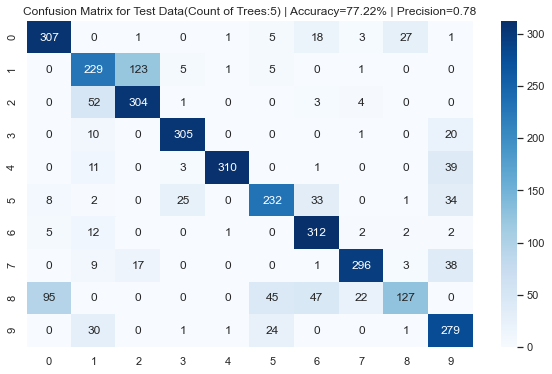

In [32]:
MakeAdaBoost(5)

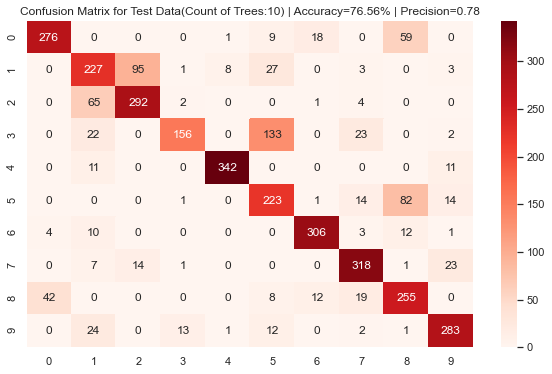

In [33]:
MakeAdaBoost(10,"Reds")

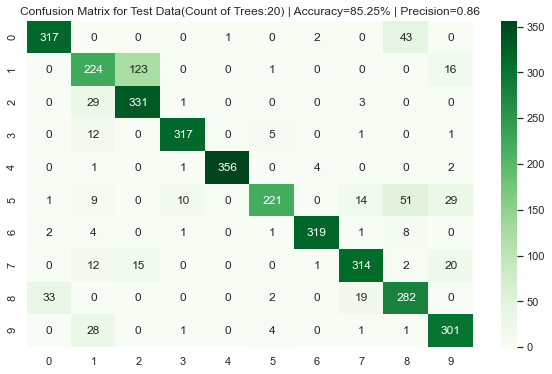

In [34]:
MakeAdaBoost(20,"Greens")

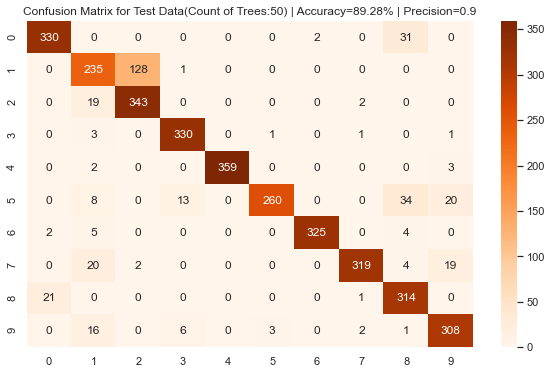

In [35]:
MakeAdaBoost(50,"Oranges")